In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE #for SMOTE -> install package using: conda install -c conda-forge imbalanced-learn
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import RandomOverSampler 
from scipy import stats, integrate
import matplotlib.pyplot as plt
import ggplot
import scipy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
#from sklearn.svm import SVR #just Testing for regression on other continous data of dataset
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2


import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

#features_list = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
#dataset1=pd.read_csv("data/Heart_Disease_Data.csv")
dataset1=pd.read_csv("data/1and5yearbankrupt.csv")


C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\RyanT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note

In [2]:
# SVM requires that each data instance is represented as a vector of real numbers
# If you already have numeric dtypes (int8|16|32|64,float64,boolean) you can convert it to another "numeric" dtype using Pandas .astype() method. Demo: In [90]: df = pd.DataFrame(np.random.randint(10**5,10**7,(5,3)),columns=list('abc'), dtype=np.int64) In [91]: df Out[91]: a b c 0 9059440 9590567 2076918 1 5861102 4566089 1947323 2 6636568 162770 2487991 3 6794572 5236903 5628779 4 470121 4044395 4546794 In [92]: df.dtypes Out[92]: a int64 b int64 c int64 dtype: object In [93]: df['a'] = df['a'].astype(float) In [94]: df.dtypes Out[94]: a float64 b int64 c int64 dtype: object It won't work for object (string) dtypes, that can't be converted to numbers: In [95]: df.loc[1, 'b'] = 'XXXXXX' In [96]: df Out[96]:...
# Just make everything numeric for ease, later we will convert to ordinal/one-hot encoding.
dataset1 = dataset1.convert_objects(convert_numeric=True)
dataset1 = dataset1.astype('float')

C:\Users\RyanT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


#### count missing value in terms of colunms #######

In [3]:
dataset1

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.554720,0.011340,1.02050,-66.5200,0.342040,0.109490,0.577520,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.73430,142.76000,2.55680,3.25970,0.0
1,-0.006202,0.484650,0.232980,1.59980,6.1825,0.000000,-0.006202,1.063400,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.27490,111.14000,3.28410,3.37000,0.0
2,0.130240,0.221420,0.577510,3.60820,120.0400,0.187640,0.162120,3.059000,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.98700,71.53100,5.10270,5.61880,0.0
3,-0.089951,0.887000,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.127400,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.33020,147.56000,2.47350,5.92990,0.0
4,0.048179,0.550410,0.107650,1.24370,-22.9590,0.000000,0.059280,0.816820,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.09500,106.43000,3.42940,3.36220,0.0
5,0.231560,0.510470,0.472910,1.93930,15.1020,0.000000,0.287690,0.958990,1.79150,0.489530,...,0.184030,0.473030,0.83996,0.014242,4.6071,4.92200,102.58000,3.55810,75.94100,0.0
6,0.099486,0.599910,0.374890,1.65290,19.0360,0.210840,0.123950,0.666900,1.09720,0.400090,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.47840,130.02000,2.80720,31.64500,0.0
7,0.078518,0.205460,0.103930,2.79390,77.7840,0.365150,0.093388,3.867200,1.23220,0.794540,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.16920,53.57500,6.81290,0.47096,0.0
8,0.125040,0.354400,0.314190,2.71270,17.9420,0.305750,0.158430,1.821700,1.23620,0.645600,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.74790,59.84100,6.09950,2.22740,0.0
9,0.293430,0.586490,0.083392,1.16940,-55.1520,-0.282110,0.293430,0.705070,1.63760,0.413510,...,0.348820,0.709610,0.72150,0.021024,9.8135,5.51040,109.70000,3.32730,3.85820,0.0


In [4]:
#dataset.shape[0] - dataset.count()
print(dataset1.isnull().any())
dataset1 = dataset1.replace('?', np.nan)

Attr1      True
Attr2      True
Attr3      True
Attr4      True
Attr5      True
Attr6      True
Attr7      True
Attr8      True
Attr9      True
Attr10     True
Attr11     True
Attr12     True
Attr13    False
Attr14     True
Attr15     True
Attr16     True
Attr17     True
Attr18     True
Attr19    False
Attr20    False
Attr21     True
Attr22     True
Attr23    False
Attr24     True
Attr25     True
Attr26     True
Attr27     True
Attr28     True
Attr29     True
Attr30    False
          ...  
Attr36     True
Attr37     True
Attr38     True
Attr39    False
Attr40     True
Attr41     True
Attr42    False
Attr43    False
Attr44    False
Attr45     True
Attr46     True
Attr47     True
Attr48     True
Attr49    False
Attr50     True
Attr51     True
Attr52     True
Attr53     True
Attr54     True
Attr55    False
Attr56    False
Attr57     True
Attr58    False
Attr59     True
Attr60     True
Attr61     True
Attr62    False
Attr63     True
Attr64     True
class     False
Length: 65, dtype: bool


#### check for duplications

In [5]:
dataset1.duplicated().any()
dataset1.drop_duplicates(inplace=True, keep=False)
dataset1


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.554720,0.011340,1.02050,-66.5200,0.342040,0.109490,0.577520,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.73430,142.76000,2.55680,3.25970,0.0
1,-0.006202,0.484650,0.232980,1.59980,6.1825,0.000000,-0.006202,1.063400,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.27490,111.14000,3.28410,3.37000,0.0
2,0.130240,0.221420,0.577510,3.60820,120.0400,0.187640,0.162120,3.059000,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.98700,71.53100,5.10270,5.61880,0.0
3,-0.089951,0.887000,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.127400,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.33020,147.56000,2.47350,5.92990,0.0
4,0.048179,0.550410,0.107650,1.24370,-22.9590,0.000000,0.059280,0.816820,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.09500,106.43000,3.42940,3.36220,0.0
5,0.231560,0.510470,0.472910,1.93930,15.1020,0.000000,0.287690,0.958990,1.79150,0.489530,...,0.184030,0.473030,0.83996,0.014242,4.6071,4.92200,102.58000,3.55810,75.94100,0.0
6,0.099486,0.599910,0.374890,1.65290,19.0360,0.210840,0.123950,0.666900,1.09720,0.400090,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.47840,130.02000,2.80720,31.64500,0.0
7,0.078518,0.205460,0.103930,2.79390,77.7840,0.365150,0.093388,3.867200,1.23220,0.794540,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.16920,53.57500,6.81290,0.47096,0.0
8,0.125040,0.354400,0.314190,2.71270,17.9420,0.305750,0.158430,1.821700,1.23620,0.645600,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.74790,59.84100,6.09950,2.22740,0.0
9,0.293430,0.586490,0.083392,1.16940,-55.1520,-0.282110,0.293430,0.705070,1.63760,0.413510,...,0.348820,0.709610,0.72150,0.021024,9.8135,5.51040,109.70000,3.32730,3.85820,0.0


In [6]:
# # based on https://pdfs.semanticscholar.org/daa0/f01f96a89fcfc5f41a2da67fb2a8966900ab.pdf 
# # we should pick these features:
# Genetic_Based_Decision = dataset1[['cp','trestbps', 'restecg', 'thalach', 'ca', 'thal']]

In [7]:
# continuous_vars = dataset1[['age', 'restecg', 'chol', 'thalach', 'oldpeak']] 

# def checkforoutlier(df):
#     outliersnumbers = 0
#     for column in df:
#         for number in df[column]:
#             if number < np.percentile(
#                 df[column], 25)-(np.percentile(
#                 df[column], 75)-np.percentile(
#                 df[column], 25)) or number > np.percentile(
#                 df[column], 75)+(np.percentile(
#                 df[column], 75)-np.percentile(
#                 df[column], 25)):
#                     print("outlier: ", number, column)
#                     outliersnumbers += 1
#     return outliersnumbers, 'outliers. That is', round(float(outliersnumbers)/float(len(df[column]))*100, 0), 'percent of the total list'

# print(checkforoutlier(continuous_vars))

# # Thalach seems very high, but after research a heartbeat of 202 is possible: 

In [8]:
# # Two variables are discrete/ordinal: ca (number of major vessels colored by fluoroscopy) and num (diagnosis of heart disease)
# # Three can be directly viewed as 1 hot (because binary): 'sex':'male', 'fbs':'fasting blood sugar', 'exang':'exercise induced angina'

# which leaves for one-hot encoding. problem is that the values aren't unique, so have to manually
# # make extra columns:

# dataset1["cp"] = dataset1["cp"].replace([1,2,3,4], ["typical angina", "atypical angina", "non-angina", "asymptomatic angina"])
# dataset1["restecg"] = dataset1["restecg"].replace([0,1,2], ["normalresecg", "ST-T wave abnormality", "left ventricular hypertrophy"])
# dataset1["slop"] = dataset1["slop"].replace([1,2,3], ["upsloping", "flat", "downsloping"])
# dataset1["thal"] = dataset1["thal"].replace([3,6,7], ["normalthal", "fixed defect", "reversible defect"])

# x = dataset1[['cp', 'restecg', 'slop', 'thal']]
# for column in ['cp', 'restecg', 'slop', 'thal']:
#     one_hot = pd.get_dummies(dataset1[column])
#     dataset1 = dataset1.drop(column, axis=1)
#     dataset1 = dataset1.join(one_hot)

In [9]:
### Extract features and labels from dataset for local testing:
dataset1.dropna(inplace=True, axis=0, how="any")
Y=dataset1["class"]
dataset1 = dataset1.drop("class", axis=1)
X=dataset1

In [10]:
# evaluate the model by splitting into train and test sets  #Edit by ryan, we aim to do 3 traditional sets in the end, this first split is 80/20
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
import collections

list1 = []
for i in labels_train:
    list1.append(i)
counter=collections.Counter(list1)
print(counter)

list2 = []
for i in labels_test:
    list2.append(i)
counter=collections.Counter(list2)
print(counter)

Counter({0.0: 4151, 1.0: 72, 2.0: 23})
Counter({0.0: 1786, 1.0: 28, 2.0: 7})


In [12]:
# Check
print(len(features_train)/(len(features_train)+ len(features_test)))

0.69985165650239


In [13]:
features_train_df = pd.DataFrame(features_train)
features_train_df.to_csv('features_train.csv', index=False)

features_test_df = pd.DataFrame(features_test)
features_test_df.to_csv('features_test.csv', index=False)

labels_train_df = pd.DataFrame(labels_train)
labels_train_df.to_csv('labels_train.csv', index=False)

labels_test_df = pd.DataFrame(labels_test)
labels_test_df.to_csv('labels_test.csv', index=False)

## Feature Importance Scores based on XGBoost (by David)

In [14]:
import xgboost as xgb
import operator

xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1,
    'num_class': 5
}

dtrain = xgb.DMatrix(features_train, labels_train)
dtest = xgb.DMatrix(features_test, labels_test)

num_boost_rounds = 250

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# train model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_rounds, watchlist)

[0]	train-mlogloss:1.52221	test-mlogloss:1.52244
[1]	train-mlogloss:1.44281	test-mlogloss:1.44323
[2]	train-mlogloss:1.37032	test-mlogloss:1.371
[3]	train-mlogloss:1.30356	test-mlogloss:1.3044
[4]	train-mlogloss:1.24178	test-mlogloss:1.24284
[5]	train-mlogloss:1.1845	test-mlogloss:1.18559
[6]	train-mlogloss:1.13109	test-mlogloss:1.13226
[7]	train-mlogloss:1.08104	test-mlogloss:1.0827
[8]	train-mlogloss:1.03432	test-mlogloss:1.03618
[9]	train-mlogloss:0.990253	test-mlogloss:0.992276
[10]	train-mlogloss:0.948767	test-mlogloss:0.951013
[11]	train-mlogloss:0.909649	test-mlogloss:0.912095
[12]	train-mlogloss:0.872715	test-mlogloss:0.875334
[13]	train-mlogloss:0.837832	test-mlogloss:0.840575
[14]	train-mlogloss:0.804626	test-mlogloss:0.807755
[15]	train-mlogloss:0.773068	test-mlogloss:0.776475
[16]	train-mlogloss:0.743256	test-mlogloss:0.746826
[17]	train-mlogloss:0.71481	test-mlogloss:0.718545
[18]	train-mlogloss:0.687644	test-mlogloss:0.691688
[19]	train-mlogloss:0.661842	test-mlogloss:0.6

[158]	train-mlogloss:0.02508	test-mlogloss:0.072312
[159]	train-mlogloss:0.024756	test-mlogloss:0.072195
[160]	train-mlogloss:0.024424	test-mlogloss:0.072145
[161]	train-mlogloss:0.024129	test-mlogloss:0.072112
[162]	train-mlogloss:0.023768	test-mlogloss:0.071986
[163]	train-mlogloss:0.023466	test-mlogloss:0.071893
[164]	train-mlogloss:0.023192	test-mlogloss:0.071752
[165]	train-mlogloss:0.022911	test-mlogloss:0.071627
[166]	train-mlogloss:0.022616	test-mlogloss:0.071623
[167]	train-mlogloss:0.022364	test-mlogloss:0.071493
[168]	train-mlogloss:0.022108	test-mlogloss:0.071453
[169]	train-mlogloss:0.021841	test-mlogloss:0.071334
[170]	train-mlogloss:0.021596	test-mlogloss:0.071208
[171]	train-mlogloss:0.02133	test-mlogloss:0.071202
[172]	train-mlogloss:0.021092	test-mlogloss:0.071119
[173]	train-mlogloss:0.020835	test-mlogloss:0.071021
[174]	train-mlogloss:0.020612	test-mlogloss:0.070899
[175]	train-mlogloss:0.020378	test-mlogloss:0.07079
[176]	train-mlogloss:0.020109	test-mlogloss:0.070

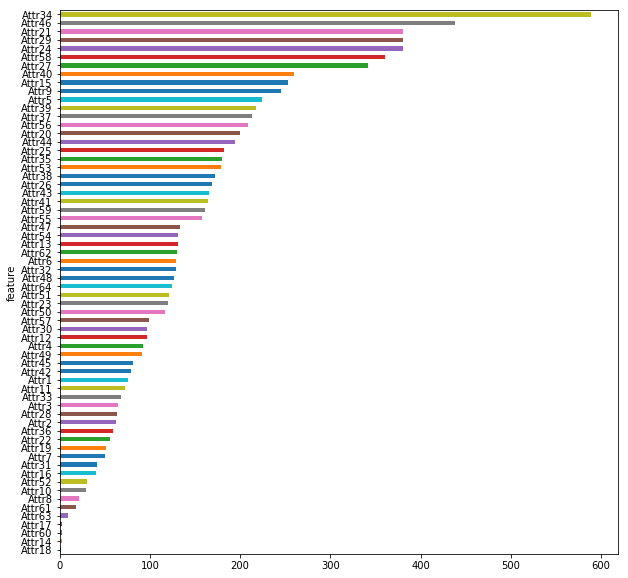

In [15]:
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

importance_df = pd.DataFrame(importance, columns=['feature', 'fscore'])

# Plot Feature Importance
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

In [16]:
def feature_selection(dataframe, importance_scores_df, threshold=0.4):
    normalized_df = importance_scores_df.copy()
    normalized_df['fscore'] = (importance_scores_df['fscore'] - importance_scores_df['fscore'].min())/(importance_scores_df['fscore'].max()-importance_scores_df['fscore'].min())
    normalized_df = normalized_df[normalized_df['fscore'] >= threshold]
    new_dataframe = dataframe.filter(items=normalized_df['feature'].tolist())
    return new_dataframe

features_train_009_df = feature_selection(features_train_df, importance_df, threshold=0.09)
features_train_009 = features_train_009_df.as_matrix()
features_train_04_df = feature_selection(features_train_df, importance_df, threshold=0.4)
features_train_04 = features_train_04_df.as_matrix()

features_test_009_df = feature_selection(features_test_df, importance_df, threshold=0.09)
features_test_009 = features_test_009_df.as_matrix()
features_test_04_df = feature_selection(features_test_df, importance_df, threshold=0.4)
features_test_04 = features_test_04_df.as_matrix()

## Principal Component Analysis 

In [17]:
from numpy import linalg as LA

def eigen_scores(dataframe):
    dataframe-=np.mean(dataframe, axis=0)
    dataframe/=np.std(dataframe, axis=0)
    cov_mat=np.cov(dataframe, rowvar=False)
    evals, evecs = np.linalg.eigh(cov_mat)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    return evals, evecs

def my_pca(dataframe, n_components):
    pca=PCA(n_components=n_components)
    return pca.fit_transform(dataframe)



eigenvalues, eigenvectors = eigen_scores(features_test_04.copy())
n_components_04 = len(np.where(eigenvalues >= 1)[0])
print("Number of components for Dataset with threshold=0.4 is {}".format(n_components_04))

features_train_04_pca = my_pca(features_train_04, n_components_04)
features_test_04_pca = my_pca(features_test_04, n_components_04)

eigenvalues, eigenvectors = eigen_scores(features_test_009.copy())
n_components_009 = len(np.where(eigenvalues >= 1)[0])
print("Number of components for Dataset with threshold=0.09 is {}".format(n_components_009))

features_train_009_pca = my_pca(features_train_009, n_components_009)
features_test_009_pca = my_pca(features_test_009, n_components_009)

Number of components for Dataset with threshold=0.4 is 4
Number of components for Dataset with threshold=0.09 is 15


# Modelling And Training

We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
validated set. 

### SMOTE for SVM - Balancing only on the training set, not the validation set  [This is for the traditional training -not the cross validated one]

In [18]:
# #further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
# features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .2, random_state=0)

# sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
# #x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train_notoversampled, labels_train_notoversampled)

# #re-enter into original variables
# ##features_train = features_train_oversampled
# ##labels_train = labels_train_oversampled

# #Below 2 lines if we want to want to force the array back into dataframe    
# ##features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
# ##labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

## Standard Scaler (by David)
SVC Models are only any good when the data is scaled. Lets scale the data and build the model

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

scaler = MinMaxScaler()
Standard_scaler = StandardScaler()
Robust_scaler = preprocessing.RobustScaler(quantile_range=(25, 75))
Quantile_scalar = preprocessing.QuantileTransformer(output_distribution='normal')

features_train = Standard_scaler.fit_transform(features_train)
features_test = Standard_scaler.transform(features_test)

features_train_009 = Standard_scaler.fit_transform(features_train_009)
features_test_009 = Standard_scaler.transform(features_test_009)

features_train_04 = Standard_scaler.fit_transform(features_train_04)
features_test_04 = Standard_scaler.transform(features_test_04)

features_train_009_pca = Standard_scaler.fit_transform(features_train_009_pca)
features_test_009_pca = Standard_scaler.transform(features_test_009_pca)

features_train_04_pca = Standard_scaler.fit_transform(features_train_04_pca)
features_test_04_pca = Standard_scaler.transform(features_test_04_pca)

# Balancing only on the training set, not the validation set
Unfortunately SMOTE categorial implementation is not really implemented
We will do undersampling of majority AND oversampling of minority -> Done using external program SPSS 

In [20]:
# # Export data to files for external program to balance the data

# # without features selection
# train = np.concatenate((features_train, labels_train.values.reshape((-1, 1))), axis=1)
# train_df = pd.DataFrame(train) 
# train_df.to_csv("Undata/train_NoEng_NB.csv", index=False)

# # train_009
# train_009 = np.concatenate((features_train_009, labels_train.values.reshape((-1, 1))), axis=1)
# train_009_df = pd.DataFrame(train_009) 
# train_009_df.to_csv("Undata/train_009_NB.csv", index=False) 
    
# # train_04 
# train_04 = np.concatenate((features_train_04, labels_train.values.reshape((-1, 1))), axis=1)
# train_04_df = pd.DataFrame(train_04) 
# train_04_df.to_csv("Undata/train_04_NB.csv", index=False)

# # train_009_pca 
# train_009_pca = np.concatenate((features_train_009_pca, labels_train.values.reshape((-1, 1))), axis=1)
# train_009_pca_df = pd.DataFrame(train_009_pca) 
# train_009_pca_df.to_csv("Undata/train_009_pca_NB.csv", index=False)

# # train_04_pca
# train_04_pca = np.concatenate((features_train_04_pca, labels_train.values.reshape((-1, 1))), axis=1)
# train_04_pca_df = pd.DataFrame(train_04_pca) 
# train_04_pca_df.to_csv("Undata/train_04_pca_NB.csv", index=False)

In [21]:
#Temp code!
# labels train009




In [ ]:
total_rows = labels_train.count()
print(total_rows)

In [ ]:
# #further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
# #features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .2, random_state=0)

# # sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
# # #x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# # features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train, labels_train)

# rus = RandomUnderSampler(ratio=0.3,random_state=42)
# features_train, labels_train = rus.fit_sample(features_train, labels_train)
# # total_rows = labels_train.count()
# # print(total_rows)
# len(labels_train)


In [ ]:
# sm = SMOTEENN(random_state=0)
# #x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train, labels_train)


# #re-enter into original variables
# features_train = features_train_oversampled
# labels_train = labels_train_oversampled

# len(labels_train)
# #Below 2 lines if we want to want to force the array back into dataframe    
# ##features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
# ##labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

In [ ]:
# # without features selection
# train_noEng_df = pd.read_csv("Bdata/train_noEng_Balanced.csv")
# labels_train_noEng = train_noEng_df["22"]
# train_noEng_df = train_noEng_df.drop("22", axis=1)
# features_train_noEng = train_noEng_df.as_matrix()
# print(features_train_noEng)

# # train_009
# train_009_df = pd.read_csv("Bdata/train_009_B.csv")
# labels_train_009 = train_009_df["14"]
# train_009_df = train_009_df.drop("14", axis=1)
# features_train_009 = train_009_df.as_matrix()

# # train_04 
# train_04_df = pd.read_csv("Bdata/train_04_B.csv")
# labels_train_04 = train_04_df["5"]
# train_04_df = train_04_df.drop("5", axis=1)
# features_train_04 = train_04_df.as_matrix()

# # train_009_pca 
# train_009_pca_df = pd.read_csv("Bdata/train_009_PCA_B.csv")
# labels_train_009_pca = train_009_pca_df["5"]
# train_009_pca_df = train_009_pca_df.drop("5", axis=1)
# features_train_009_pca = train_009_pca_df.as_matrix()

# # train_04_pca
# train_04_pca_df = pd.read_csv("Bdata/train_04_PCA_B.csv")
# labels_train_04_pca = train_04_pca_df["2"]
# train_04_pca_df = train_04_pca_df.drop("2", axis=1)
# features_train_04_pca = train_04_pca_df.as_matrix()

In [20]:
features_train_009

array([[ 0.52483633,  0.99307616,  0.01881451, ..., -0.02420943,
        -0.0481059 , -0.51593223],
       [ 0.13404317, -0.17595256,  0.00570822, ..., -0.0246157 ,
        -0.16369792,  0.58085292],
       [-0.1844455 , -0.334862  , -0.01189615, ..., -0.0236486 ,
        -0.2131816 , -0.66129966],
       ..., 
       [-0.23947626, -0.69516728, -0.03823553, ..., -0.02268032,
        -0.05085357, -0.67199474],
       [-0.34478555, -0.11569117,  0.03342268, ..., -0.02765812,
        -0.13750265, -0.70381406],
       [ 0.39089888, -0.26507451, -0.02682582, ..., -0.02073824,
        -0.05971286, -0.37754938]])

In [23]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import reciprocal, uniform

def checkmetrics(pred, labels_test, name):
    sns.set()
    print('The accuracy of ', name, 'is: ', accuracy_score(pred, labels_test))
    matrix = confusion_matrix(labels_test, pred)
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    print(ax)
    print(classification_report(pred, labels_test))

## Feature selection?

In [22]:
# # Feature selection using RFECV to pick best features,
# from sklearn.svm import SVR
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import RandomizedLasso
# from sklearn.feature_selection import RFECV
# rlasso = RandomizedLasso(alpha=0.025)
# names = features_list
# rlasso.fit(features_train, labels_train)
 
# print("Features sorted by their score using lasso:")
# print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
#                  names), reverse=True))

# #use linear regression as the model
# lr = LinearRegression()
# #rank all features, i.e continue the elimination until the last one
# rfe = RFE(lr, n_features_to_select=1)
# rfe.fit(X,Y)
 
# print("Features sorted by their score using Linear Regression:")
# print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

## Modelling with HyperParameters -Tuning - Default Dataset

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


The train score: 0.703956665097 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.708401976936
Axes(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        0.0       0.71      1.00      0.83      1272
        1.0       0.61      0.11      0.19       148
        2.0       0.71      0.01      0.02       401

avg / total       0.70      0.71      0.60      1821



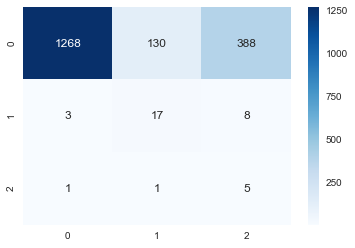

In [25]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.5,1.0,2.0,5.0,10.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
        'class_weight' : ['balanced'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished


The train score: 0.977861516722 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.980779791323
Axes(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99      1821
        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         0

avg / total       1.00      0.98      0.99      1821



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


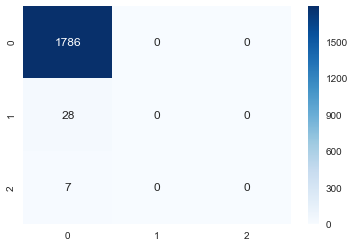

In [24]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-5,1e-4,1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-4],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using Important Features with threshold >= 0.4 (XGB)

### XGB1 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


The train score: 0.655440414508 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.686985172982
Axes(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        0.0       0.69      1.00      0.81      1231
        1.0       0.61      0.10      0.17       169
        2.0       0.86      0.01      0.03       421

avg / total       0.72      0.69      0.57      1821



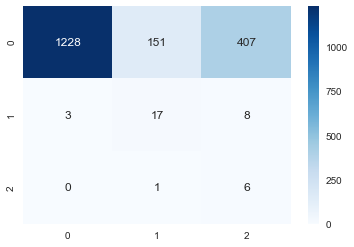

In [27]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
            'class_weight' : ['balanced'],

        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-5,1e-4,1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04, labels_train_04)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04, labels_train_04)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1,0.15], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-5],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04, labels_train_04)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04, labels_train_04)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using Important Features with threshold >= 0.09 (XGB)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


The train score: 0.714554875177 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.712246018671
Axes(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        0.0       0.72      1.00      0.83      1283
        1.0       0.57      0.11      0.19       142
        2.0       0.57      0.01      0.02       396

avg / total       0.67      0.71      0.61      1821



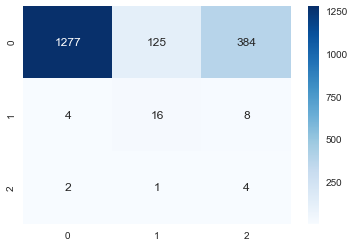

In [26]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
            'class_weight' : ['balanced'],

        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-5,1e-4,1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009, labels_train_009)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009, labels_train_009)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-4],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009, labels_train_009)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009, labels_train_009)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using PCA with Important Features (threshold >= 0.09) (XGB)

In [ ]:
#svm.SVC  C-Support Vector Classification.
parameters ={
         'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
         'kernel': ['linear','poly','rbf'],
         'degree': [2,3,4,5,6],
        'gamma': [1e-3,1e-2,1,2,'auto'],
        'tol' : [1e-4],
        'decision_function_shape' : ['ovo','ovr'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009_pca, labels_train_009_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009_pca, labels_train_009_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009_pca)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-4],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009_pca, labels_train_009_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009_pca, labels_train_009_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009_pca)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-4],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009_pca, labels_train_009_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009_pca, labels_train_009_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009_pca)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using PCA with Important Features (threshold >= 0.4) (XGB)

In [ ]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-3],
#         'decision_function_shape' : ['ovo','ovr'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04_pca, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04_pca, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04_pca)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:   28.8s


In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-3],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04_pca, labels_train_04_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04_pca, labels_train_04_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04_pca)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-3],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04_pca, labels_train_04_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04_pca, labels_train_04_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04_pca)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')
